In [2]:
import Pkg; Pkg.add("Flux")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed ZygoteRules ───────── v0.2.7
   Installed RealDot ───────────── v0.1.0
   Installed PrettyPrint ───────── v0.2.0
   Installed ContextVariablesX ─── v0.1.3
   Installed MLUtils ───────────── v0.4.8
   Installed ShowCases ─────────── v0.1.0
   Installed Accessors ─────────── v0.1.42
   Installed InitialValues ─────── v0.3.1
   Installed FLoopsBase ────────── v0.1.1
   Installed DefineSingletons ──── v0.1.2
   Installed MLCore ────────────── v1.0.0
   Installed ProgressLogging ───── v0.1.5
   Installed MicroCollections ──── v0.2.0
   Installed OneHotArrays ──────── v0.2.10
   Installed IRTools ───────────── v0.4.15
   Installed Zygote ────────────── v0.7.10
   Installed CompositionsBase ──── v0.1.2
   Installed NameResolution ────── v0.1.5
   Installed JuliaVariables ────── v0.2.4
   Installed BangBang ──────────── v0.4.4
   Installed FLoops ────────────── v0.2.2
   Installed ChainRul

In [6]:
import Pkg; Pkg.add("MLDatasets")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [7]:
using Flux, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using MLDatasets: MNIST, CIFAR10 # Import MNIST directly from MLDatasets
using CUDA
using Plots




┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt ~/.julia/packages/Flux/uRn8o/ext/FluxCUDAExt/FluxCUDAExt.jl:10
┌ Warning: CIFAR10.traindata() is deprecated, use `CIFAR10(split=:train)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/0MkOE/src/datasets/vision/cifar10.jl:215


This program has requested access to the data dependency CIFAR10.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: The CIFAR-10 dataset
Authors: Alex Krizhevsky, Vinod Nair, Geoffrey Hinton
Website: https://www.cs.toronto.edu/~kriz/cifar.html
Reference: https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

[Krizhevsky, 2009]
    Alex Krizhevsky.
    "Learning Multiple Layers of Features from Tiny Images",
    Tech Report, 2009.

The CIFAR-10 dataset is a labeled subsets of the 80
million tiny images dataset. It consists of 60000
32x32 colour images in 10 classes, with 6000 images
per class.

The compressed archive file that contains the
complete dataset is available for download at the
offical website linked above; specifically the binary
version for C programs. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of CIFAR-10 aren't really
explicit about an

┌ Warning: CIFAR10.testdata() is deprecated, use `CIFAR10(split=:test)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/0MkOE/src/datasets/vision/cifar10.jl:223


10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [27]:
import Pkg; Pkg.add("MLUtils")

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [f1d291b0] + MLUtils v0.4.8
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [31]:
using Flux, MLDatasets, Statistics, Random, Plots, MLUtils


train_x, train_y = CIFAR10.traindata(Float32)
test_x, test_y = CIFAR10.testdata(Float32)

# Preprocess data: normalize and reshape
train_x = reshape(train_x, 32, 32, 3, :)
test_x = reshape(test_x, 32, 32, 3, :)
train_y = Flux.onehotbatch(train_y, 0:9)
test_y = Flux.onehotbatch(test_y, 0:9)

#  LeNet5 architecture
lenet5 = Chain(
    Conv((5,5), 3=>6, relu),
    MaxPool((2,2)),
    Conv((5,5), 6=>16, relu),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(16*5*5, 120, relu),
    Dense(120, 84, relu),
    Dense(84, 10),
    softmax
)

# Define loss function and optimizer
loss(model, x, y) = Flux.crossentropy(model(x), y)
opt = ADAM()


# Training
epochs = 10
batch_size = 128
accuracy(x, y) = mean(Flux.onecold(lenet5(x)) .== Flux.onecold(y))

for epoch in 1:epochs

    Flux.train!(loss, lenet5, eachbatch((train_x, train_y), batch_size), opt)
    @show accuracy(test_x, test_y)
end

println("Final test accuracy: ", accuracy(test_x, test_y))

┌ Warning: CIFAR10.traindata() is deprecated, use `CIFAR10(split=:train)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/0MkOE/src/datasets/vision/cifar10.jl:215
┌ Warning: CIFAR10.testdata() is deprecated, use `CIFAR10(split=:test)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/0MkOE/src/datasets/vision/cifar10.jl:223
┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0

accuracy(test_x, test_y) = 0.4583


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.4973


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5205


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5372


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5501


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5593


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5668


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5762


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.585


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

accuracy(test_x, test_y) = 0.5915
Final test accuracy: 0.5915


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

N=10000, epochs=6 => accuracy=0.5829


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

N=20000, epochs=3 => accuracy=0.5991


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

N=30000, epochs=2 => accuracy=0.5958


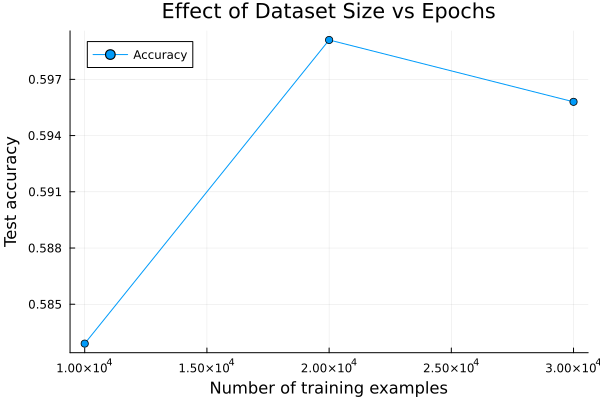

In [35]:
using Random

# Subset selection
Random.seed!(42)
indices = randperm(50000)[1:30000]
train_x_sub = train_x[:,:,:,indices]
train_y_sub = train_y[:,indices]


configs = [
    (n=10000, epochs=6),
    (n=20000, epochs=3),
    (n=30000, epochs=2)
]

accuracies = Float64[]

for config in configs

    sub_x = train_x_sub[:,:,:,1:config.n]
    sub_y = train_y_sub[:,1:config.n]

    # Reset model
    model = deepcopy(lenet5)


    # Training
    for epoch in 1:config.epochs
        Flux.train!((model, x, y)->Flux.crossentropy(model(x), y), model,
                   eachbatch((sub_x, sub_y), batch_size), opt)
    end

    # Evaluate
    acc = mean(Flux.onecold(model(test_x)) .== Flux.onecold(test_y))
    push!(accuracies, acc)
    println("N=$(config.n), epochs=$(config.epochs) => accuracy=$acc")
end

# Plot
plot([10000, 20000, 30000], accuracies,
     xlabel="Number of training examples",
     ylabel="Test accuracy",
     title="Effect of Dataset Size vs Epochs",
     label="Accuracy", marker=:circle)

┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], Float32[0.0 0.0 

LeNet3 accuracy: 0.6418


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

LeNet5 accuracy: 0.5982


┌ Warning: Optimiser Adam has state which will be discarded after `train!` finishes.
│ Please run `opt = Flux.setup(Adam(), model)` and pass this `opt` to `train!`.
│   leaf = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0

LeNet7 accuracy: 0.6072


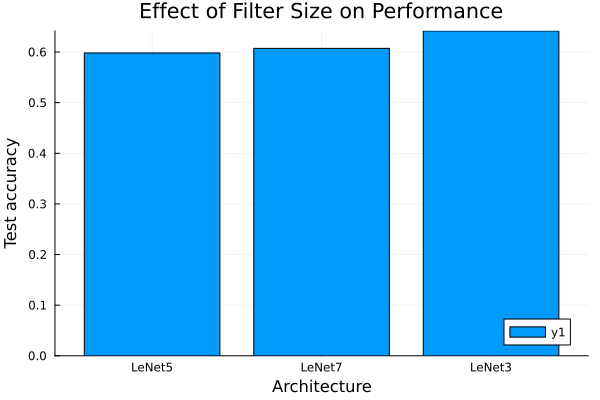

In [40]:
# LeNet3 (3x3 filters)
lenet3 = Chain(
    Conv((3,3), 3=>6, relu, pad=SamePad()),
    MaxPool((2,2)),
    Conv((3,3), 6=>16, relu, pad=SamePad()),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(16*8*8, 120, relu),  # Corrected size
    Dense(120, 84, relu),
    Dense(84, 10),
    softmax
)

# LeNet7 (7x7 filters)
lenet7 = Chain(
    Conv((7,7), 3=>6, relu, pad=SamePad()),
    MaxPool((2,2)),
    Conv((7,7), 6=>16, relu, pad=SamePad()),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(16*8*8, 120, relu),  # Corrected size
    Dense(120, 84, relu),
    Dense(84, 10),
    softmax
)

# Train and evaluate all variants
architectures = [("LeNet3", lenet3), ("LeNet5", lenet5), ("LeNet7", lenet7)]
results = Dict()



for (name, model) in architectures

    for epoch in 1:10
        Flux.train!((model, x,y)->Flux.crossentropy(model(x), y), model,
                   eachbatch((train_x, train_y), batch_size), opt)
    end
    acc = mean(Flux.onecold(model(test_x)) .== Flux.onecold(test_y))
    results[name] = acc
    println("$name accuracy: $acc")
end

# Plot results
bar(collect(keys(results)), collect(values(results)),
    xlabel="Architecture", ylabel="Test accuracy",
    title="Effect of Filter Size on Performance")

In [42]:
import Pkg; Pkg.add("Images")

   Resolving package versions...
   Installed LERC_jll ────────────────── v3.0.0+1
   Installed TiledIteration ──────────── v0.5.0
   Installed x265_jll ────────────────── v4.1.0+0
   Installed ImageMagick ─────────────── v1.4.2
   Installed ImageSegmentation ───────── v1.9.0
   Installed GR_jll ──────────────────── v0.73.7+0
   Installed HistogramThresholding ───── v0.3.1
   Installed RegionTrees ─────────────── v0.3.2
   Installed SLEEFPirates ────────────── v0.6.43
   Installed Distances ───────────────── v0.10.12
   Installed FFMPEG ──────────────────── v0.4.4
   Installed Images ──────────────────── v0.26.2
   Installed MetaGraphs ──────────────── v0.8.0
   Installed ArnoldiMethod ───────────── v0.4.0
   Installed NearestNeighbors ────────── v0.4.22
   Installed Polynomials ─────────────── v4.1.0
   Installed x264_jll ────────────────── v10164.0.1+0
   Installed CustomUnitRanges ────────── v1.0.2
   Installed Graphics ────────────────── v1.1.3
   Installed Enzyme ─────────────────

In [48]:
import Pkg; Pkg.add("ImageCore")

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [a09fc81d] + ImageCore v0.10.5
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


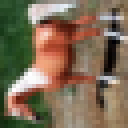

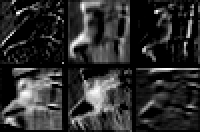

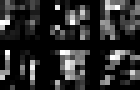

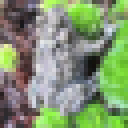

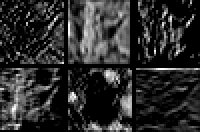

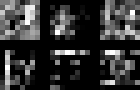

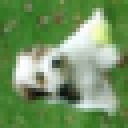

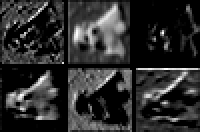

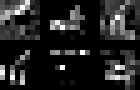

In [49]:
using Images, ImageCore

# 3 random test samples
sample_indices = rand(1:size(test_x,4), 3)
samples = test_x[:,:,:,sample_indices]

# Function to visualize layer activations
function visualize_activations(model, x)
    # Extract first convolution layer
    conv1 = model[1]
    conv1_activations = conv1(x)

    # Extract second convolution layer (need to pass through first layers)
    partial_model = Chain(model[1:3]...)
    conv2 = model[4]
    conv2_input = partial_model(x)
    conv2_activations = conv2(conv2_input)

    return conv1_activations, conv2_activations
end

#  visualizations
for (i, idx) in enumerate(sample_indices)
    x = samples[:,:,:,i:i]

    # Get activations
    conv1_acts, conv2_acts = visualize_activations(lenet3, x)

    # Original image
    original_img = colorview(RGB, permutedims(x[:,:,:,1], (3,1,2)))

    # Visualize first conv layer activations (first 6 filters)
    conv1_imgs = [Gray.(conv1_acts[:,:,f,1] ./ maximum(conv1_acts[:,:,f,1])) for f in 1:6]
    conv1_grid = mosaicview(conv1_imgs; nrow=2, npad=2)

    # Visualize second conv layer activations (first 6 filters)
    conv2_imgs = [Gray.(conv2_acts[:,:,f,1] ./ maximum(conv2_acts[:,:,f,1])) for f in 1:6]
    conv2_grid = mosaicview(conv2_imgs; nrow=2, npad=2)

    #  results
    display(original_img)
    display(conv1_grid)
    display(conv2_grid)
end